<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up</B> for Health - Exploratory Analysis</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B> | Jan du Plessis Notebook - <B>Exploratory Analysis</b></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
</div>

In [60]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
RAW_DATA = '~/code/janduplessis883/data-showup/data/raw-data/'
WEATHER_DATA = '~/code/janduplessis883/data-showup/data/weather/weather.csv'
IMD_DATA = '~/code/janduplessis883/data-showup/data/imd-master/imd_master.csv'

OUTPUT_DATA = '~/code/janduplessis883/data-showup/data/output-data/'

In [9]:
data = pd.read_csv(f'{OUTPUT_DATA}training_data_no_features.csv')
data.head(3)

,Appointment booked date,Appointment date,Appointment status,Appointment time,Booked by,Clinician,Rota type,Patient ID,app datetime,temp,precipitation,Age in years,Postcode,Sex,Registration date,Ethnicity category,Language,Registration status,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,Latitude,Longitude,IMD2023,dist_to_station,distance_from_surg
0,10-May-22,14-Jul-22,Finished,10:00 - 10:59,"FLORKO, Aleksandra (Miss)","FLORKO, Aleksandra (Miss)",Earls Court Surgery Registrar,19581842,2022-07-14 10:00:00,21.6,0.0,73,SW5 9BY,Male,2009-08-17 00:00:00,Other Mixed,(XaG5t) Main spoken language English,"Deceased, Deducted",0.0,0,0,0,0,0,0,0,51.490204,-0.193625,16808.0,0.136631,0.204712
1,10-May-22,14-Jul-22,Finished,10:00 - 10:59,"FLORKO, Aleksandra (Miss)","FLORKO, Aleksandra (Miss)",Earls Court Surgery Registrar,19581842,2022-07-14 10:00:00,21.6,0.0,73,SW5 9BY,Male,2009-08-17 00:00:00,Other,(XaG5t) Main spoken language English,"Deceased, Deducted",0.0,0,0,0,0,0,0,0,51.490204,-0.193625,16808.0,0.136631,0.204712
2,10-May-22,14-Jul-22,Finished,10:00 - 10:59,"FLORKO, Aleksandra (Miss)","FLORKO, Aleksandra (Miss)",Earls Court Surgery Registrar,19581842,2022-07-14 10:00:00,21.6,0.0,73,SW5 9BY,Male,2009-08-17 00:00:00,British or Mixed British,(XaG5t) Main spoken language English,"Deceased, Deducted",0.0,0,0,0,0,0,0,0,51.490204,-0.193625,16808.0,0.136631,0.204712


Patient ID


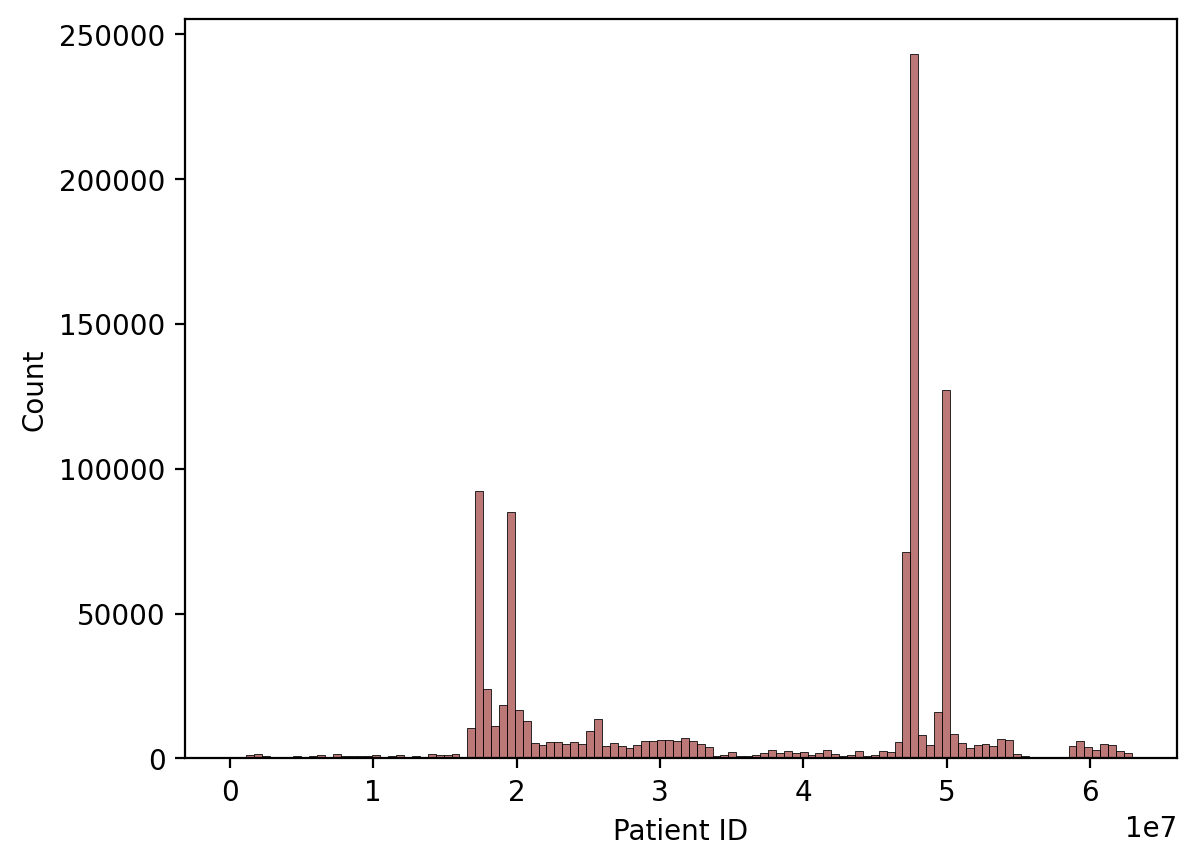

temp


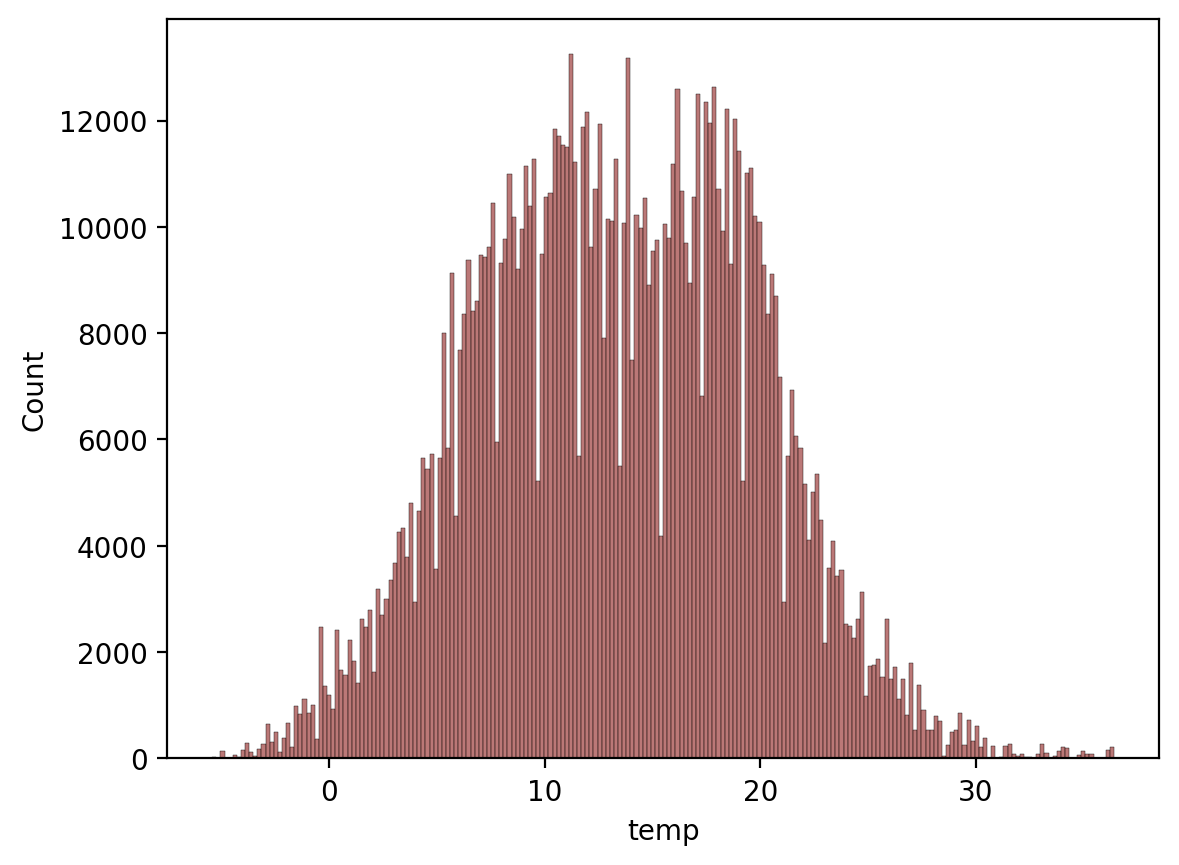

precipitation


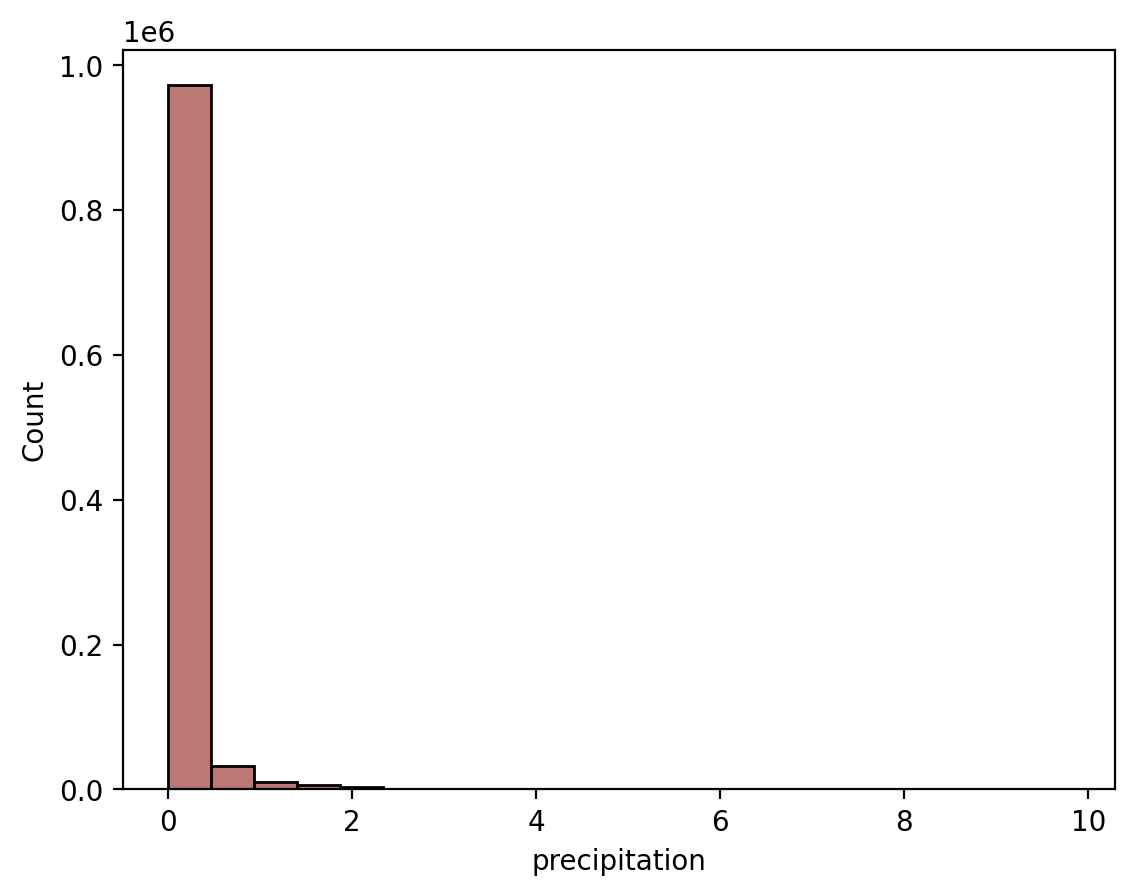

Age in years


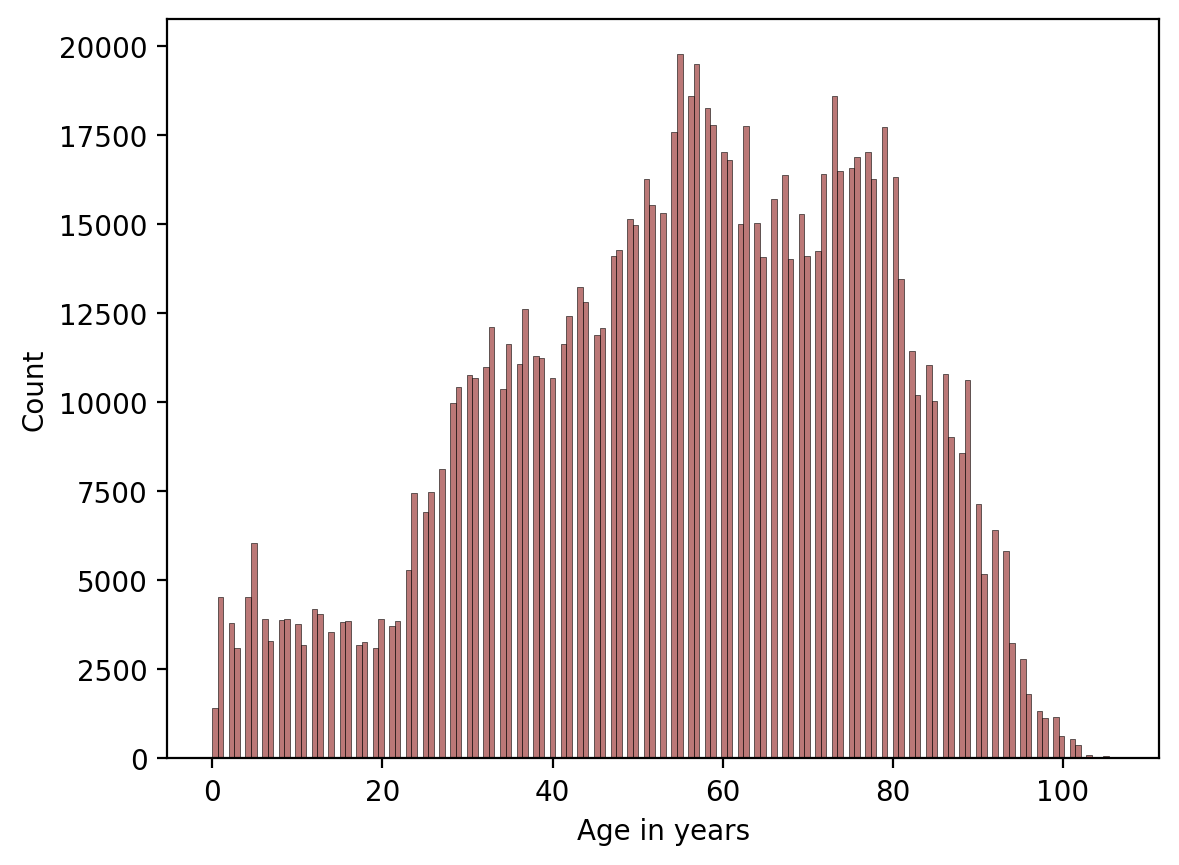

FRAILTY


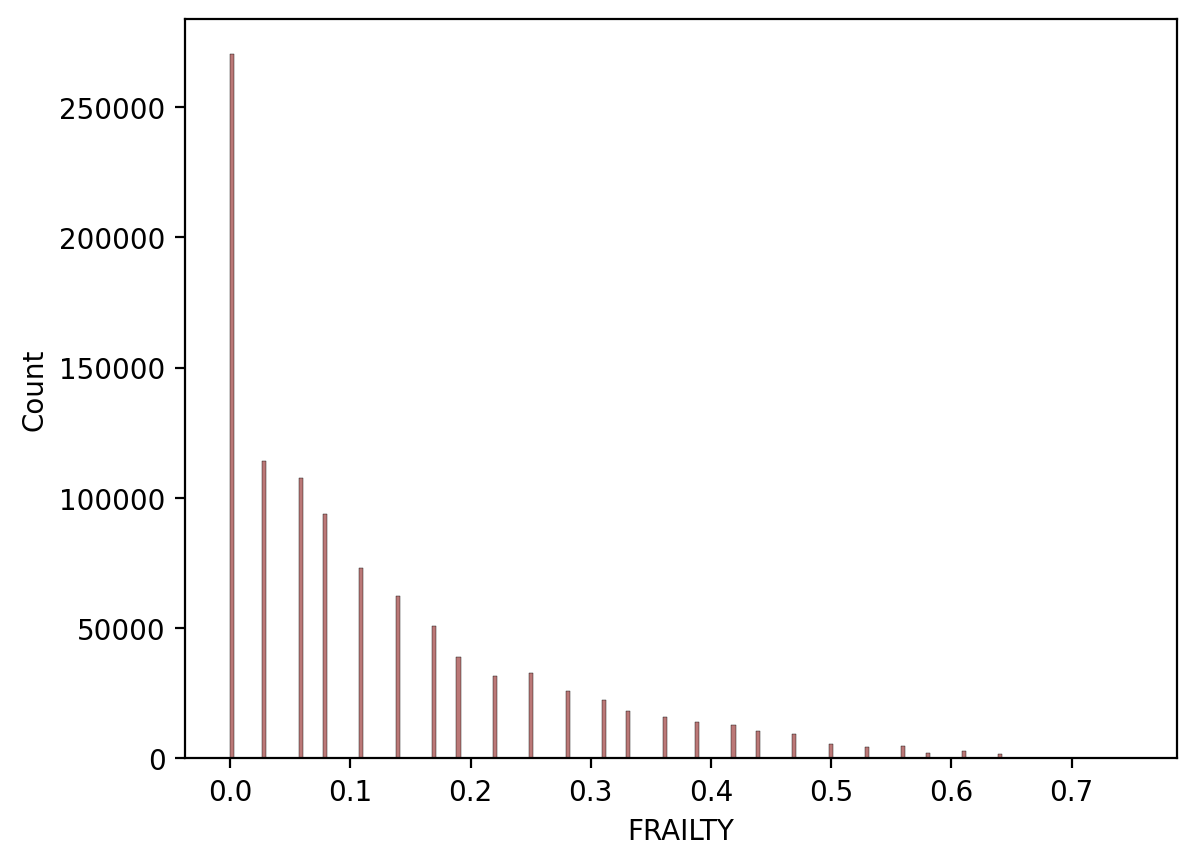

DEPRESSION


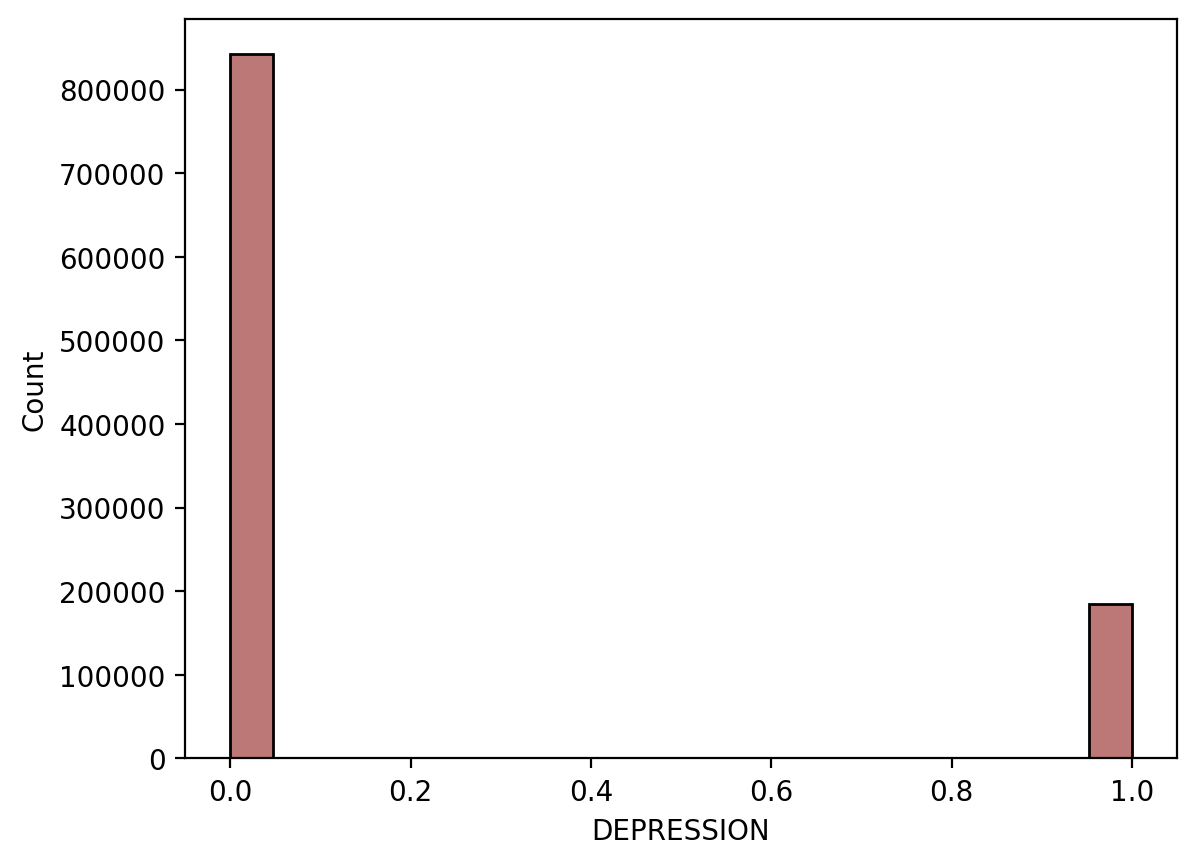

OBESITY


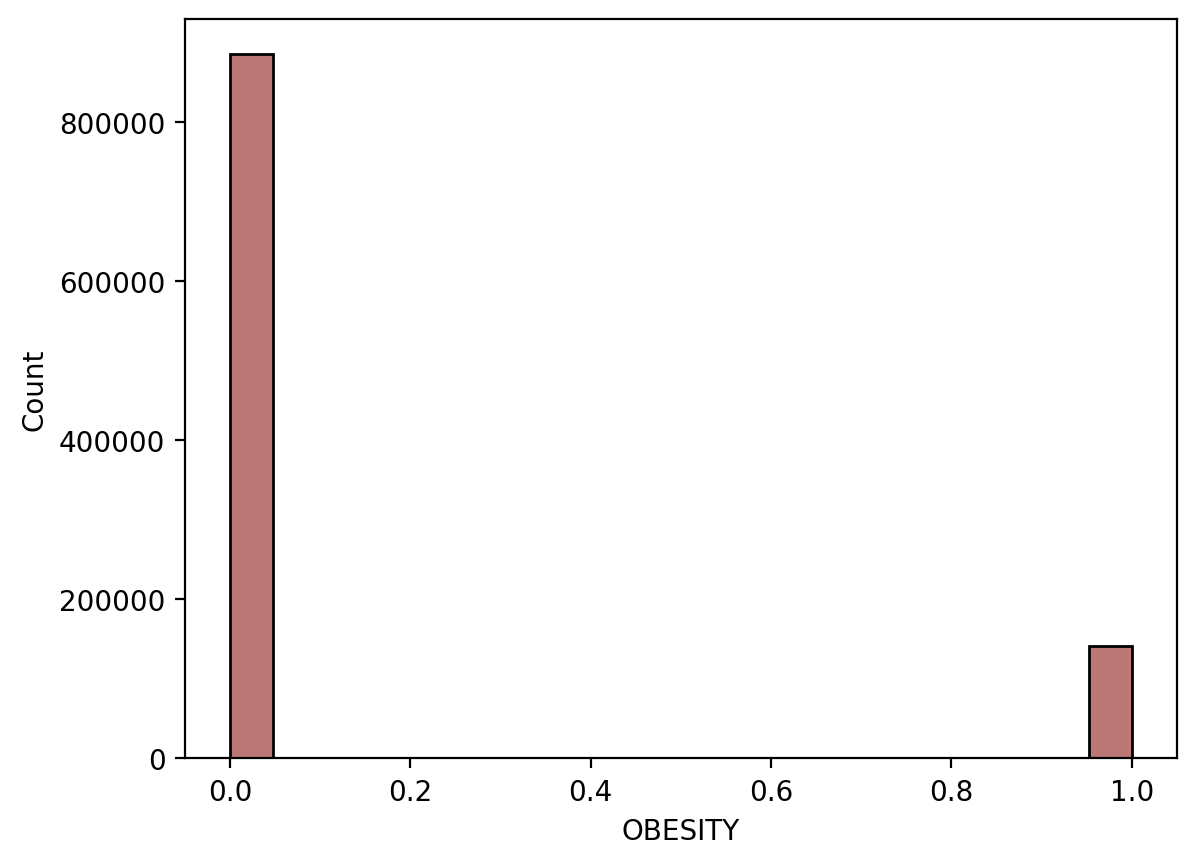

IHD


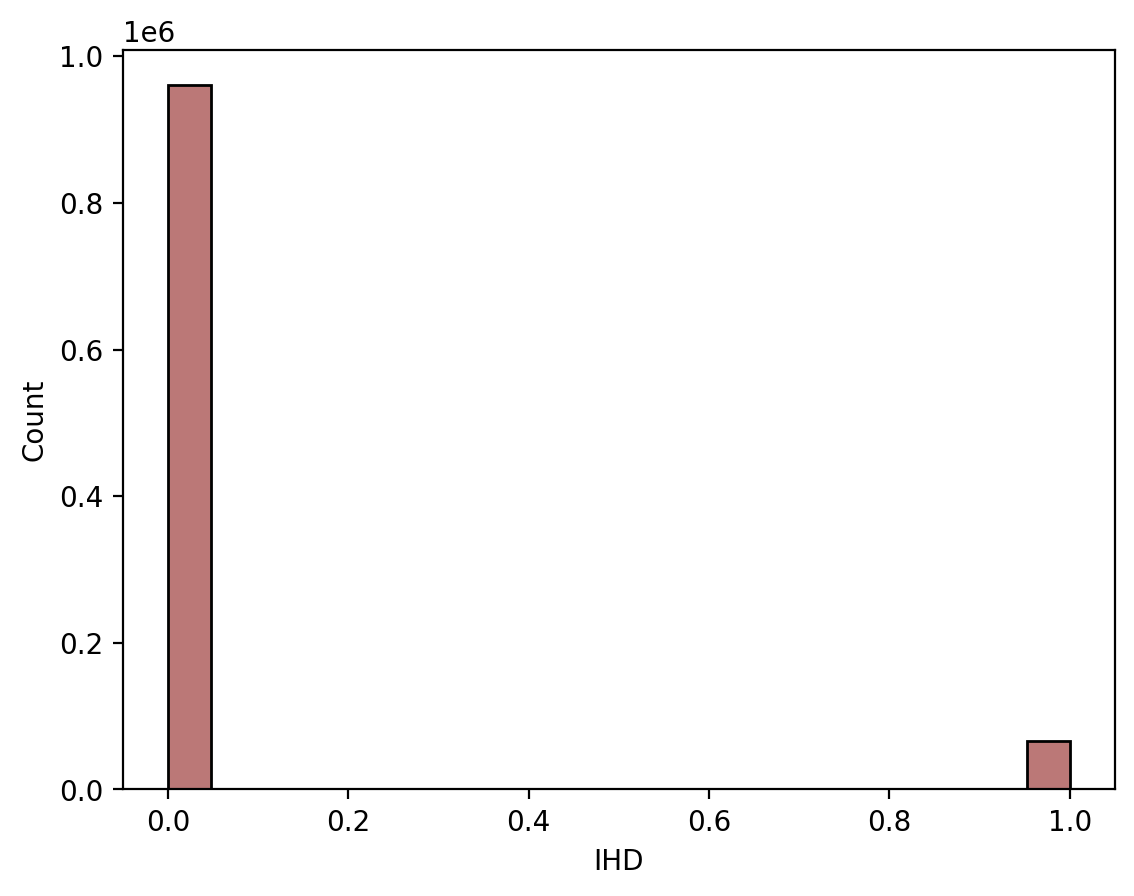

DM


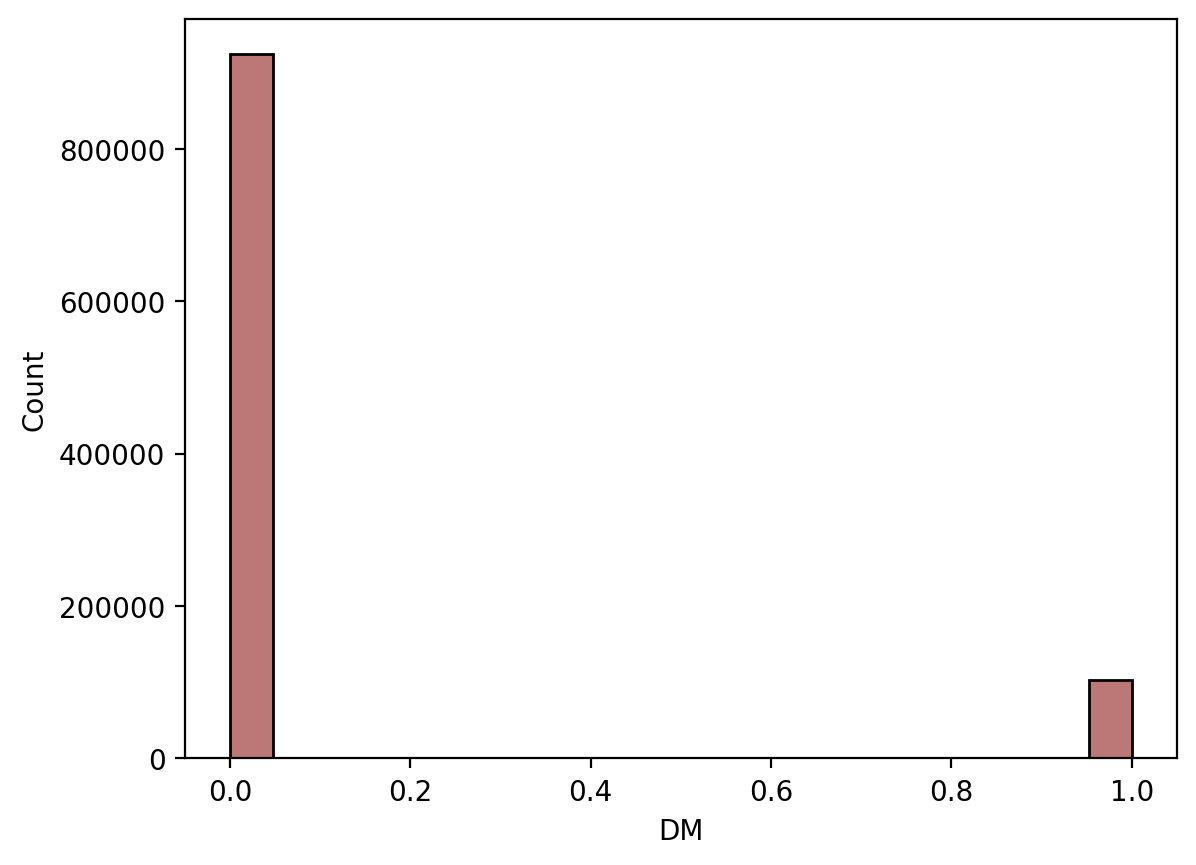

HPT


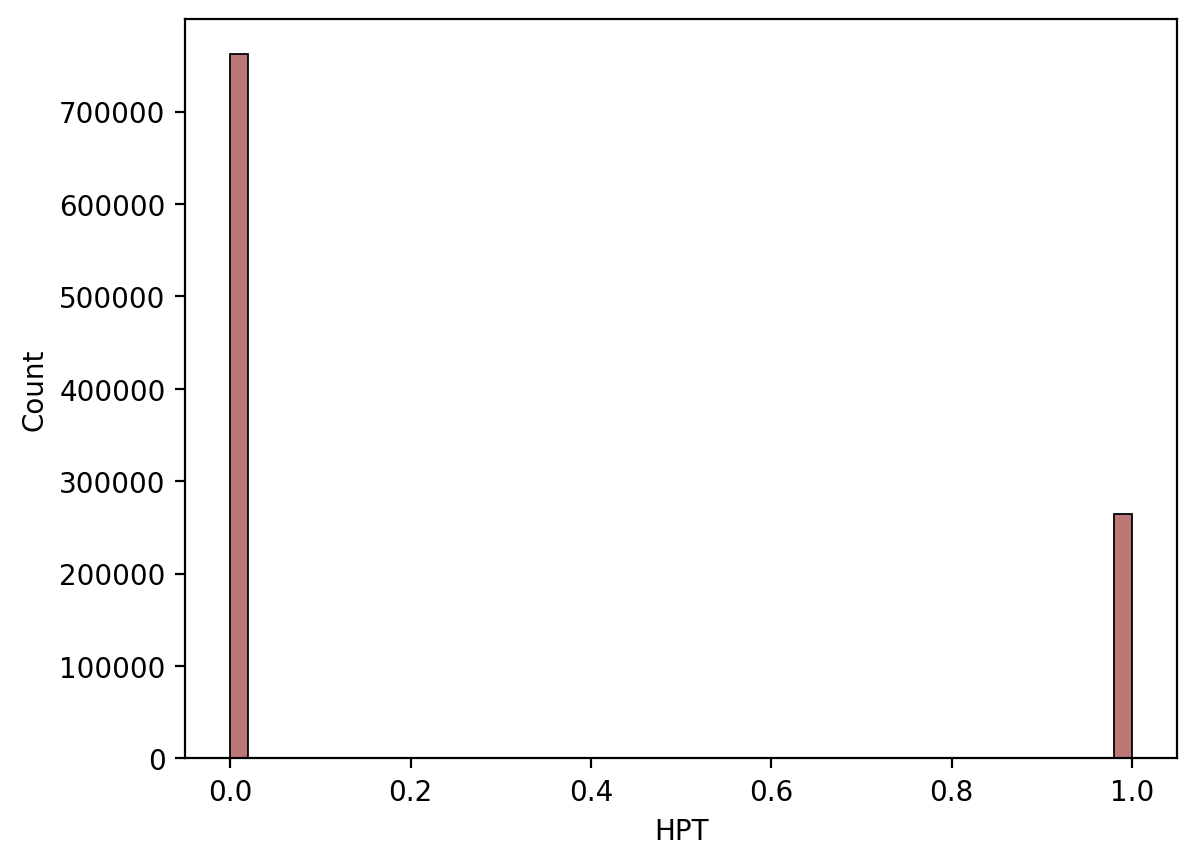

NDHG


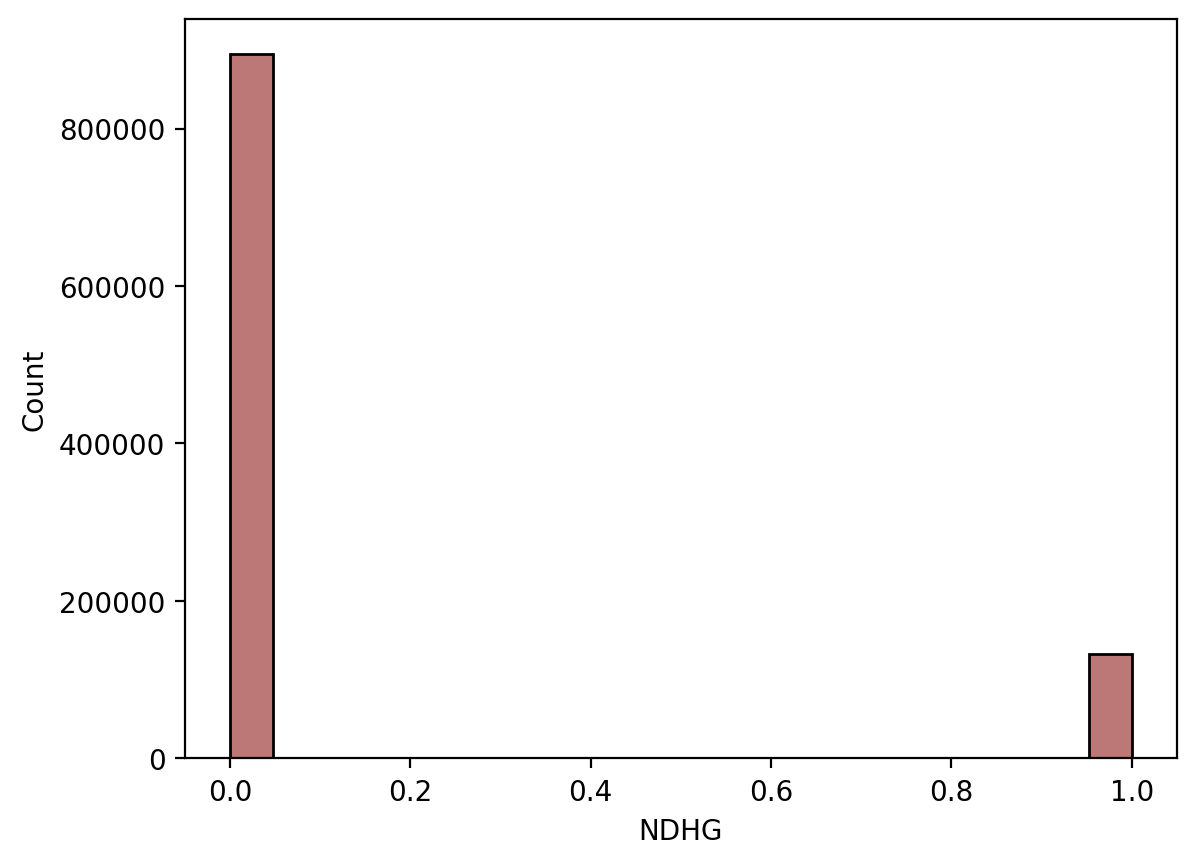

SMI


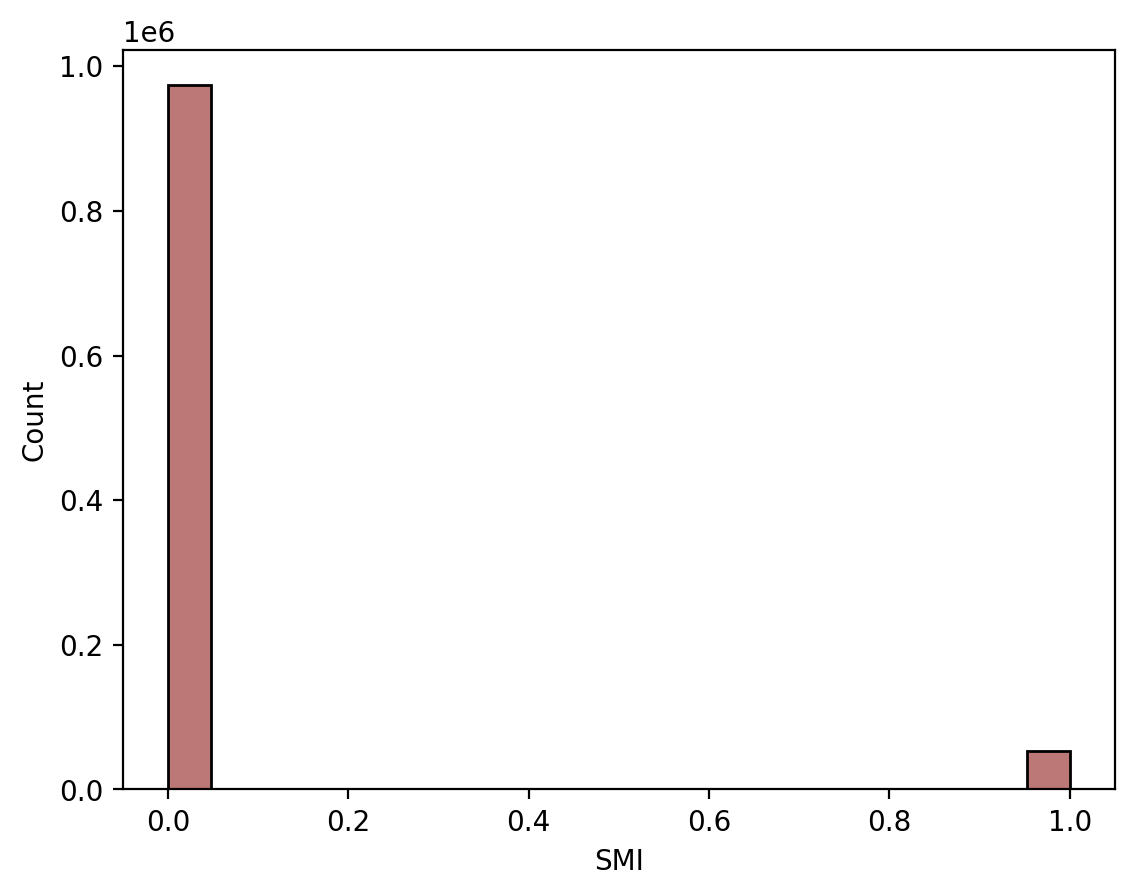

Latitude


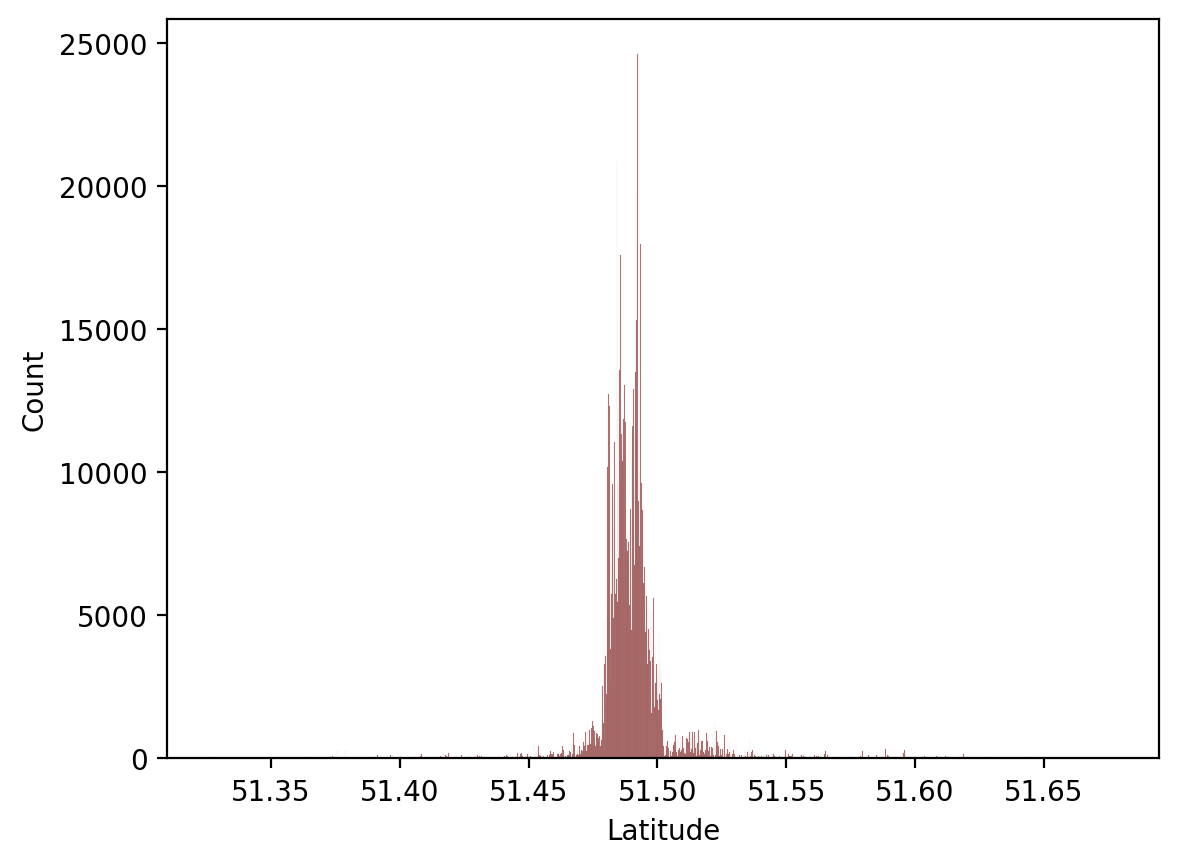

Longitude


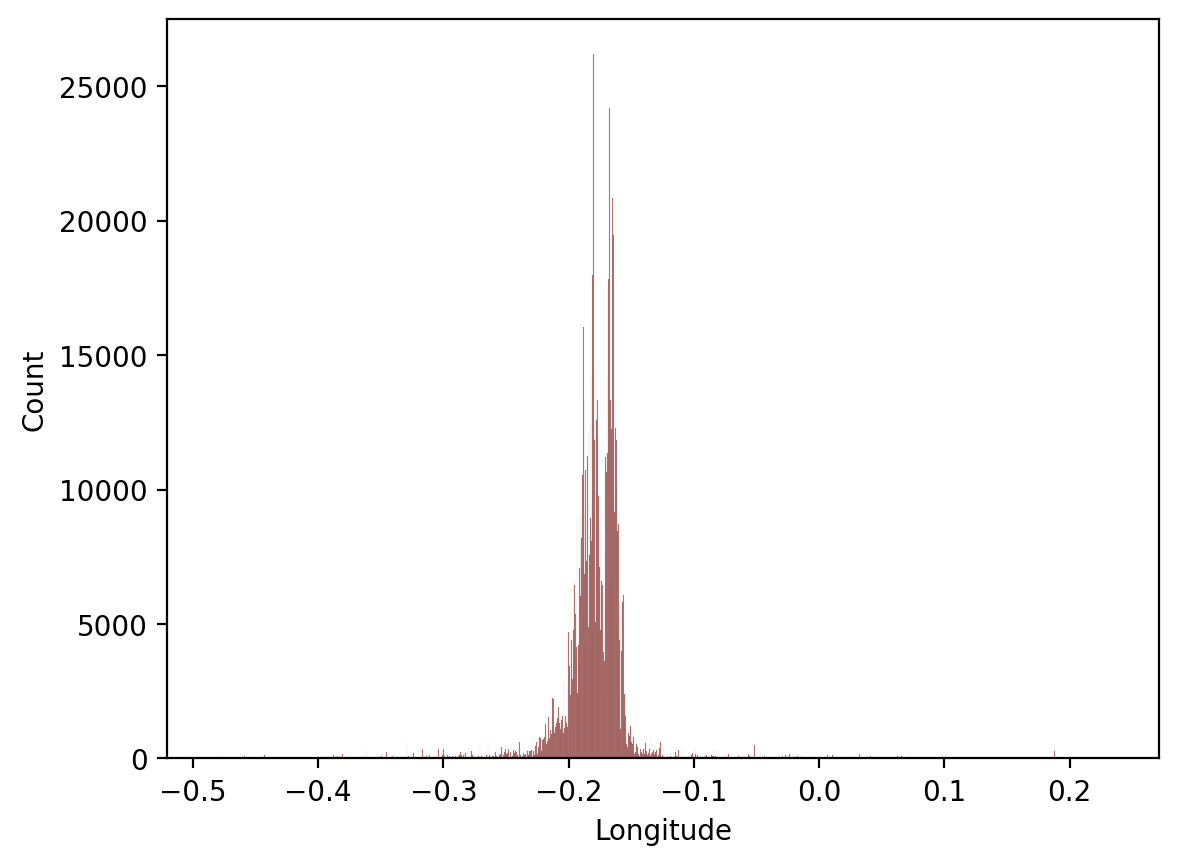

IMD2023


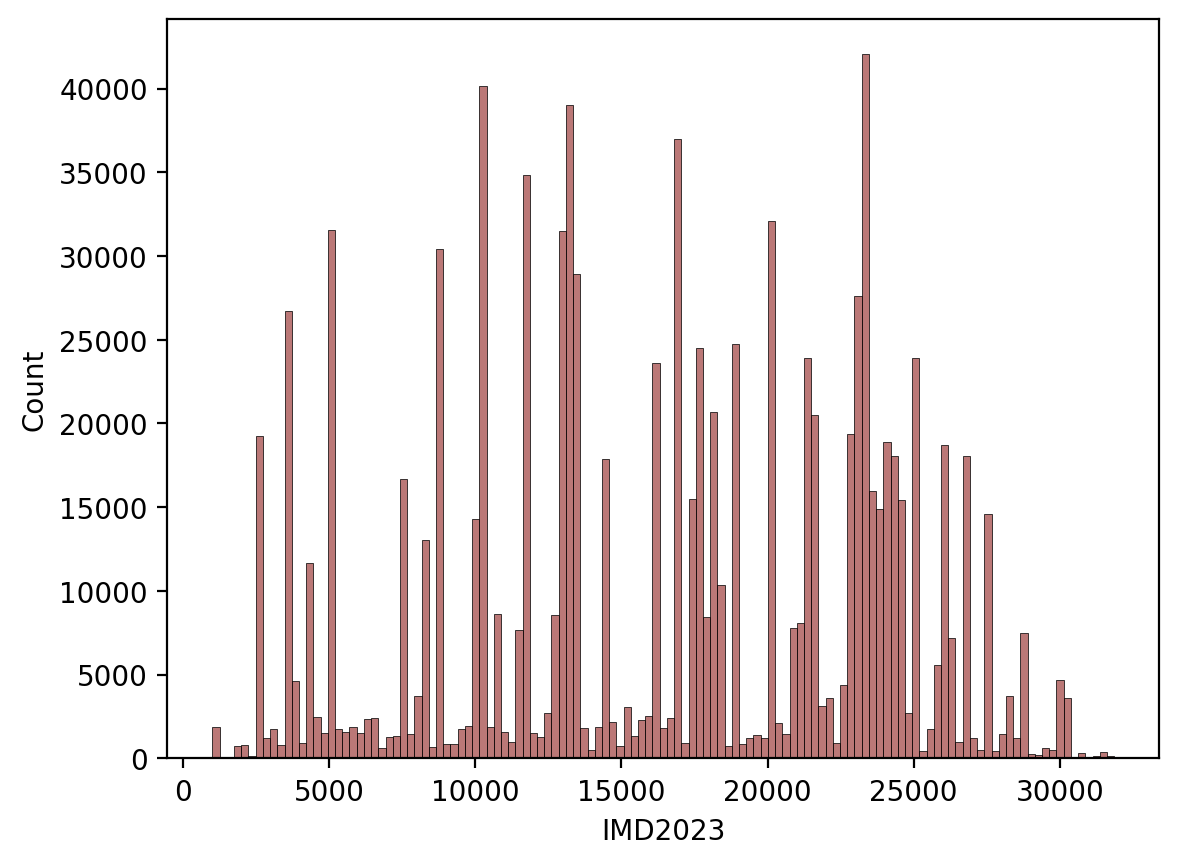

dist_to_station


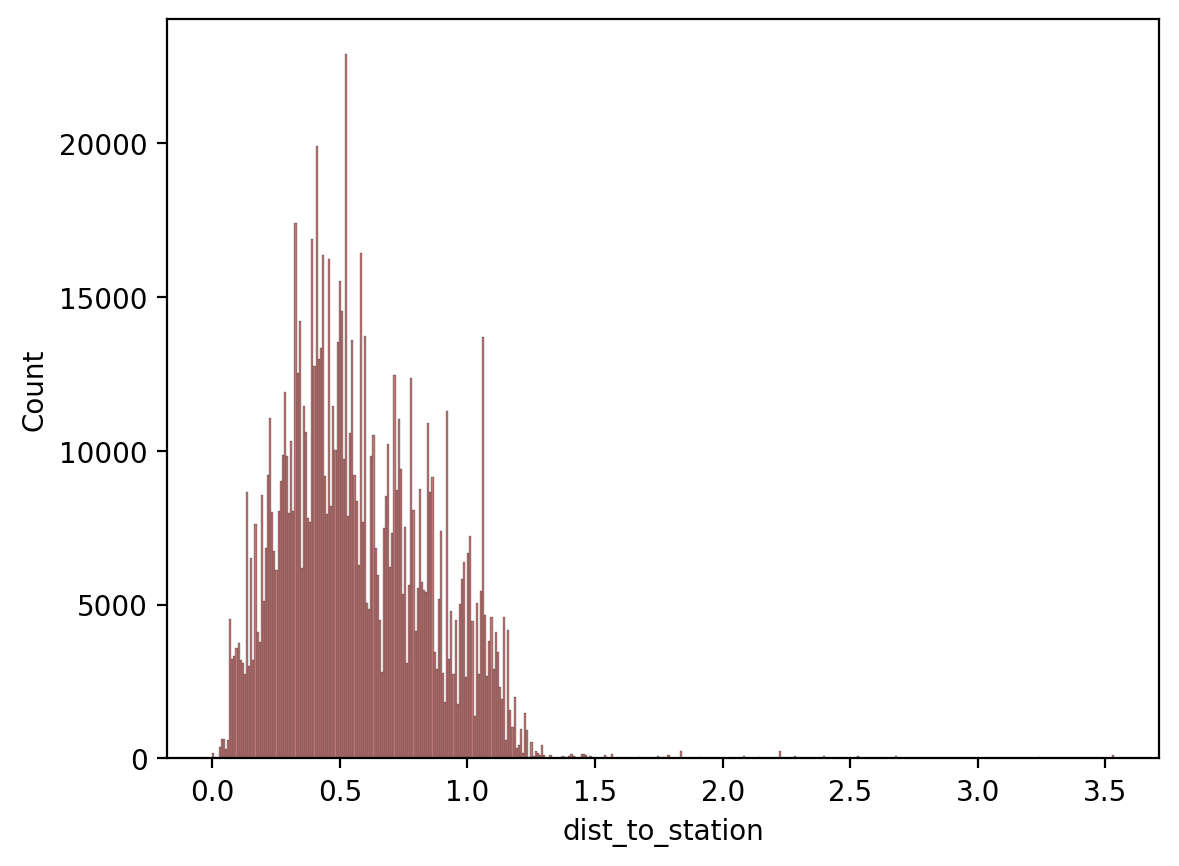

distance_from_surg


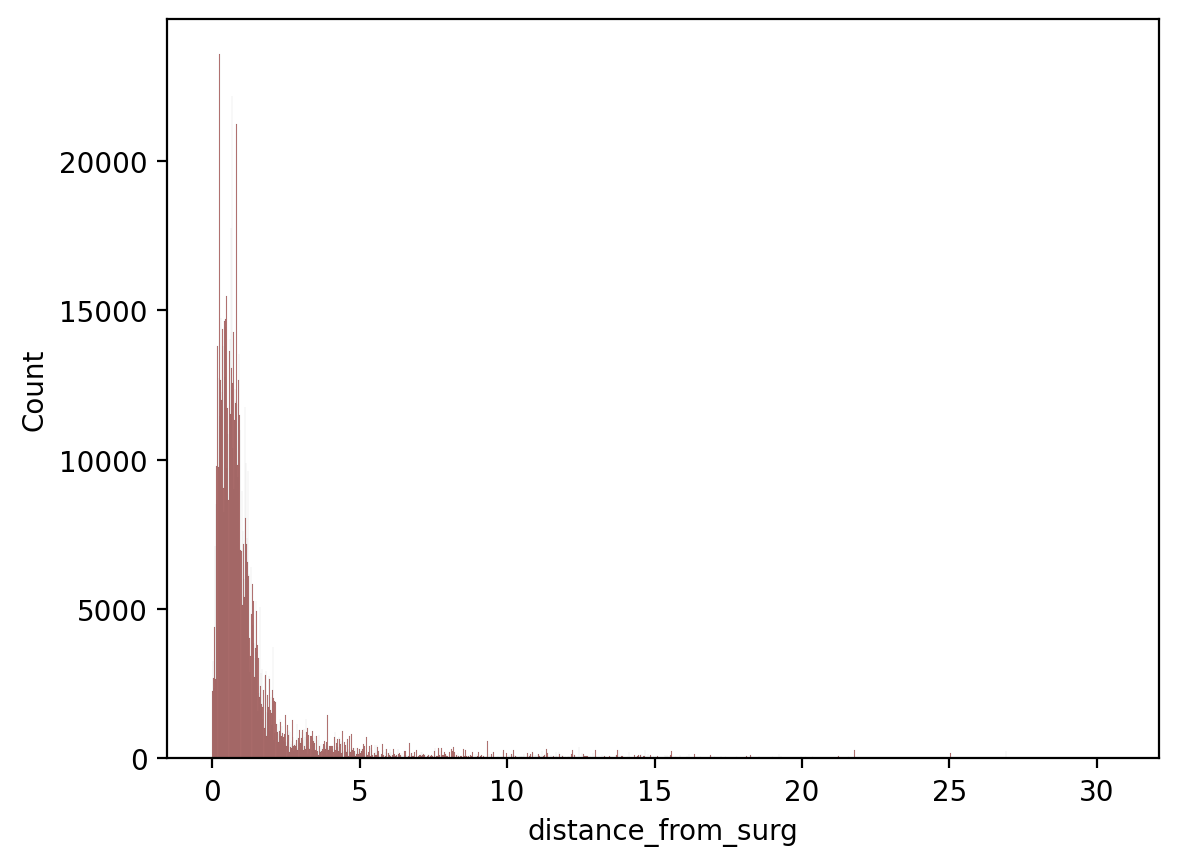

In [10]:
# Select columns with numeric data types
numeric_columns = data.select_dtypes(include=['number']).columns

# Convert to list
numeric_columns_list = numeric_columns.tolist()

for n in numeric_columns_list:
    print(n)
    sns.histplot(data=data, x=n, color='#a54b49')
    plt.show()

In [18]:
data['Ethnicity category'].value_counts()

British or Mixed British              348221
Other White                           292552
Other                                 121739
Other Asian                            63912
Other Mixed                            44993
African                                31635
Other Black                            22332
Irish                                  20231
Indian or British Indian               19416
White & Asian                          13918
Pakistani or British Pakistani          9831
Chinese                                 9554
Caribbean                               9456
White & Black African                   9090
White & Black Caribbean                 6982
Bangladeshi or British Bangladeshi      2895
Name: Ethnicity category, dtype: int64

In [16]:
data['Language'].value_counts(normalize=True)

(XaG5t) Main spoken language English                          7.381104e-01
(XaG5p) Main spoken language Arabic                           5.315376e-02
(XaJD5) Main spoken language Italian                          2.239478e-02
(XaG66) Main spoken language Spanish                          1.918857e-02
(XaIpr) Main spoken language Farsi                            1.802569e-02
(XaG5u) Main spoken language French                           1.638362e-02
(XaG62) Main spoken language Portuguese                       1.157820e-02
(Ua0HJ) Main spoken language                                  1.042213e-02
(XaJPA) Main spoken language Tagalog                          9.742325e-03
(XaG64) Main spoken language Russian                          8.860909e-03
(XaG61) Main spoken language Polish                           6.757198e-03
(XaQHz) Main spoken language Filipino                         4.993392e-03
(Xa6ev) English language                                      4.822952e-03
(XaG6A) Main spoken langu

In [12]:
data.head()

,Appointment booked date,Appointment date,Appointment status,Appointment time,Booked by,Clinician,Rota type,Patient ID,app datetime,temp,precipitation,Age in years,Postcode,Sex,Registration date,Ethnicity category,Language,Registration status,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,Latitude,Longitude,IMD2023,dist_to_station,distance_from_surg
0,10-May-22,14-Jul-22,Finished,10:00 - 10:59,"FLORKO, Aleksandra (Miss)","FLORKO, Aleksandra (Miss)",Earls Court Surgery Registrar,19581842,2022-07-14 10:00:00,21.6,0.0,73,SW5 9BY,Male,2009-08-17 00:00:00,Other Mixed,(XaG5t) Main spoken language English,"Deceased, Deducted",0.00,0,0,0,0,0,0,0,51.490204,-0.193625,16808.0,0.136631,0.204712
1,10-May-22,14-Jul-22,Finished,10:00 - 10:59,"FLORKO, Aleksandra (Miss)","FLORKO, Aleksandra (Miss)",Earls Court Surgery Registrar,19581842,2022-07-14 10:00:00,21.6,0.0,73,SW5 9BY,Male,2009-08-17 00:00:00,Other,(XaG5t) Main spoken language English,"Deceased, Deducted",0.00,0,0,0,0,0,0,0,51.490204,-0.193625,16808.0,0.136631,0.204712
2,10-May-22,14-Jul-22,Finished,10:00 - 10:59,"FLORKO, Aleksandra (Miss)","FLORKO, Aleksandra (Miss)",Earls Court Surgery Registrar,19581842,2022-07-14 10:00:00,21.6,0.0,73,SW5 9BY,Male,2009-08-17 00:00:00,British or Mixed British,(XaG5t) Main spoken language English,"Deceased, Deducted",0.00,0,0,0,0,0,0,0,51.490204,-0.193625,16808.0,0.136631,0.204712
3,12-May-22,05-Jul-22,Finished,09:00 - 09:59,"FLORKO, Aleksandra (Miss)","FLORKO, Aleksandra (Miss)",Earls Court Surgery Nurse,19580589,2022-07-05 09:00:00,17.7,0.0,40,W8 6JQ,Female,2014-01-07 00:00:00,Other White,(XaG62) Main spoken language Portuguese,Current,0.00,0,0,0,0,0,0,0,51.496001,-0.193468,22698.0,0.519419,0.816996
4,17-May-22,05-Jul-22,Finished,10:00 - 10:59,"LE TELLIER, Jean-Pierre","FLORKO, Aleksandra (Miss)",Earls Court Surgery Nurse,47551135,2022-07-05 10:00:00,18.5,0.0,70,SW3 3SQ,Male,2017-03-06 00:00:00,Indian or British Indian,(XaG5t) Main spoken language English,Current,0.39,0,1,0,1,1,0,0,51.490771,-0.168178,10169.0,0.540792,1.656309


In [13]:
data['Sex'].value_counts()

Female           648805
Male             377833
Indeterminate        78
Unknown              41
Name: Sex, dtype: int64

In [15]:
data['Registration status'].value_counts()

Current               908518
Deducted               85123
Deceased, Deducted     32986
Deceased                 130
Name: Registration status, dtype: int64

In [17]:
data['Rota type'].value_counts()

KMC GP                                       150148
Redcliffe GP                                 112407
Session                                       94593
The Good Practice GP                          90789
Stanhope Mews GP                              88329
The Chelsea Practice GP                       56742
Earls Court Surgery GP                        39546
Stanhope Mews Nurse                           27766
KMC Nurse                                     26611
GP Session                                    20369
Redcliffe Nurse                               19683
Redcliffe Pharmacist                          17962
KMC Pharmacist                                17253
Redcliffe Registrar                           13564
Health Partners at VM GP                      13526
Earls Court Surgery Pharmacist                12585
Redcliffe HCA                                 12564
Stanhope Mews Nurse Practitioner              11204
The Chelsea Practice Nurse                    10765
HCA Session 

# Making full Training Dataset

In [156]:
from showupforhealth.params import *
from showupforhealth.ml_functions.data import *
from showupforhealth.ml_functions.preprocessor import *

In [157]:
data = make_full_preprocess_data()

NameError: name 'time' is not defined

In [7]:
data.shape

(1026757, 32)

In [83]:
data = pd.read_csv(f'{OUTPUT_DATA}full_preprocess_data.csv')

In [84]:
df = feature_engeneering(data)

‼️ Feature Engineering =================================================================
➡️ Convert Datetime Columns
➡️ Booked by Clinician
➡️ Hash Patient ID
➡️ Encode Appointment status
➡️ Mapping Ethnicity category
➡️ Months Registered with practice
➡️ Map Rota types - renamed Rota
➡️ Labelencoding Sex
➡️ Extract Time of Appointment
➡️ Split appointment date
➡️ Deseased and deducted
➡️ Months Registered with practice
➡️ OHE Columns
➡️ Drop and rename columns


In [85]:
df.head()

,Appointment date,Rota,Patient ID,temp,precipitation,Age,Sex,Ethnicity category,Language,Registration status,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,booked_by_clinician,Appointment_status,months_registered,hour_of_appointment,Day,Week,Month,days_booked_to_app
0,2022-07-14,GP,ae223de3,21.6,0.0,73,2,Mixed,(XaG5t) Main spoken language English,"Deceased, Deducted",0.00,0,0,0,0,0,0,0,16808.0,0.136631,0.204712,1,1,155.0,10,3,28,7,65
1,2022-07-14,GP,ae223de3,21.6,0.0,73,2,Unknown,(XaG5t) Main spoken language English,"Deceased, Deducted",0.00,0,0,0,0,0,0,0,16808.0,0.136631,0.204712,1,1,155.0,10,3,28,7,65
2,2022-07-14,GP,ae223de3,21.6,0.0,73,2,White,(XaG5t) Main spoken language English,"Deceased, Deducted",0.00,0,0,0,0,0,0,0,16808.0,0.136631,0.204712,1,1,155.0,10,3,28,7,65
3,2022-07-05,Nurse,4d5c84e0,17.7,0.0,40,0,White,(XaG62) Main spoken language Portuguese,Current,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,1,1,102.0,9,1,27,7,54
4,2022-07-05,Nurse,7eb307c3,18.5,0.0,70,2,Asian,(XaG5t) Main spoken language English,Current,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,0,1,64.0,10,1,27,7,49


In [87]:
df['Rota'].value_counts()

GP       773483
Nurse    124186
ARRS      73117
HCA       48360
Name: Rota, dtype: int64